In [20]:
library(rstan)
library(here)
library(bayesplot)
library(ggfortify)

# 計算の高速化
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


In [21]:
sales_df_5 <- read.csv(here("data", "5-7-1-sales-ts-5.csv"))
sales_df_5$date <- as.POSIXct(sales_df_5$date)
head(sales_df_5, n = 3)


,date,sales
,<dttm>,<dbl>
1,2010-01-01,91.0
2,2010-01-02,96.5
3,2010-01-03,113.8


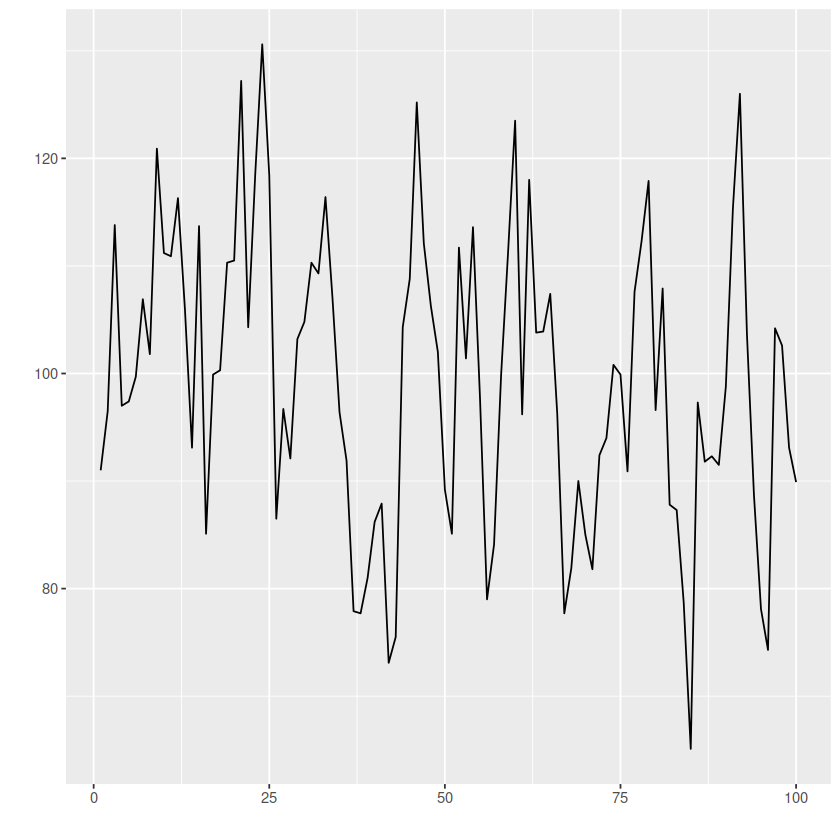

In [12]:
autoplot(ts(sales_df_5[, -1]))


In [25]:
data_list <- list(
  y = sales_df_5$sales,
  T = nrow(sales_df_5)
)

autoregressive <- stan(
  file = here("5部", "5-7-1-autoregressive.stan"),
  data = data_list,
  seed = 1,
  control = list(max_treedepth = 15),
)



Divergences:


0 of 4000 iterations ended with a divergence.




Tree depth:


0 of 4000 iterations saturated the maximum tree depth of 15.




Energy:


E-BFMI indicated no pathological behavior.



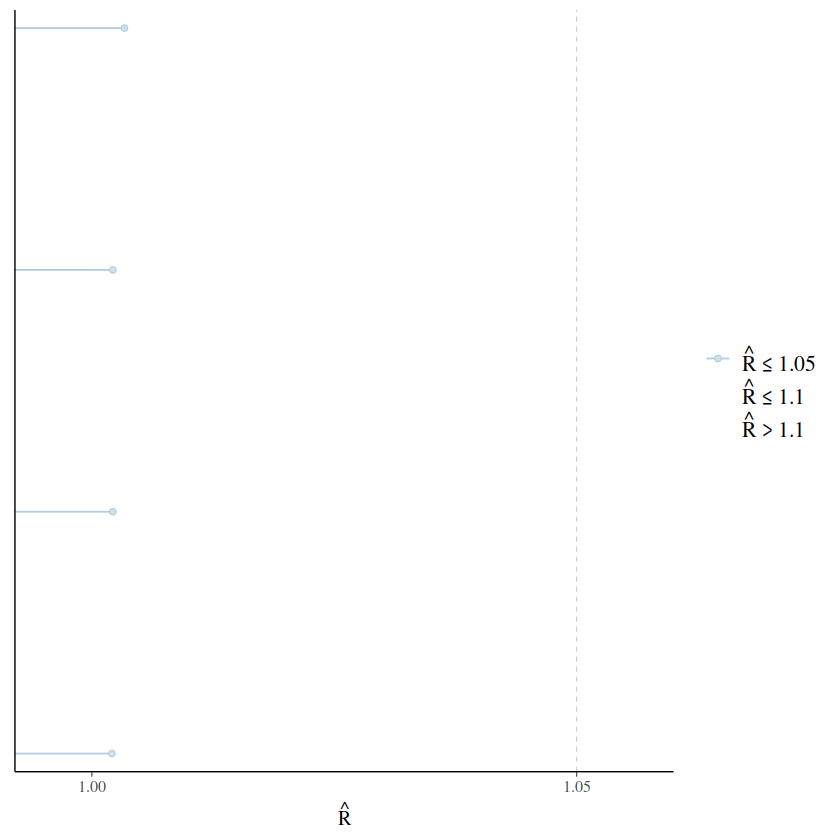

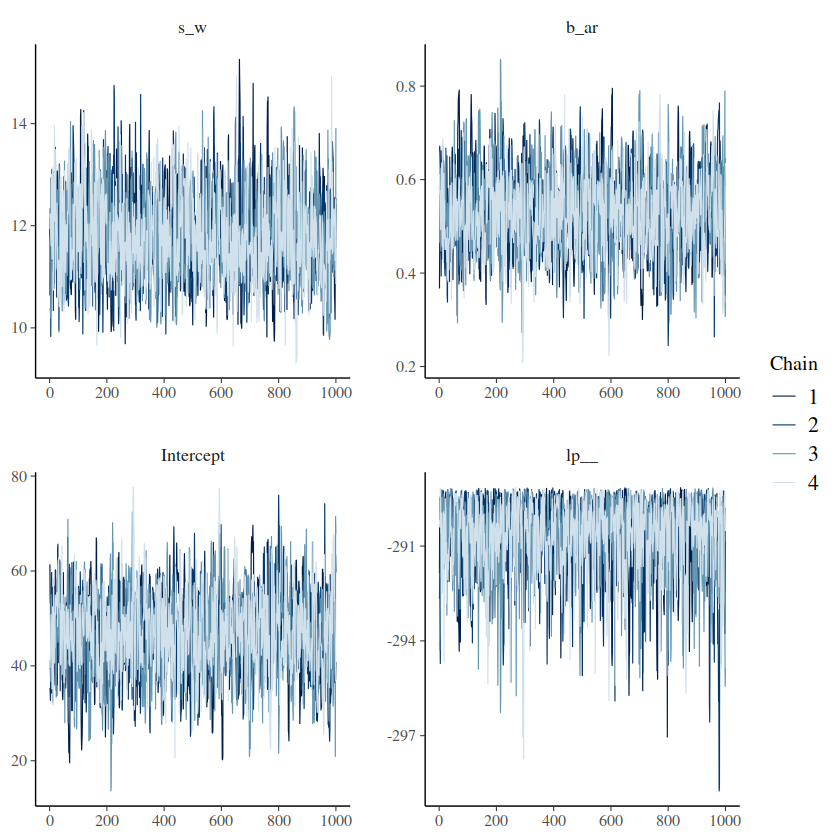

In [31]:
mcmc_rhat(rhat(autoregressive))
check_hmc_diagnostics(autoregressive)

mcmc_sample <- rstan::extract(autoregressive, permuted = FALSE)
mcmc_trace(mcmc_sample, pars = c("s_w", "b_ar", "Intercept", "lp__"))


In [27]:
print(autoregressive,
  par = c("s_w", "b_ar", "Intercept", "lp__"),
  probs = c(0.025, 0.5, 0.975)
)


Inference for Stan model: anon_model.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean   sd    2.5%     50%   97.5% n_eff Rhat
s_w         11.80    0.02 0.85   10.25   11.75   13.52  1721    1
b_ar         0.53    0.00 0.09    0.36    0.53    0.70  1299    1
Intercept   46.59    0.24 8.66   29.85   46.47   63.69  1284    1
lp__      -290.66    0.03 1.22 -293.94 -290.33 -289.25  1229    1

Samples were drawn using NUTS(diag_e) at Sun Sep 15 21:14:35 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
